In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy

In [2]:
def vocabulary_size(data, column="Cognateset_ID"):
    """Count different words in vocabulary."""
    return len(set(data[column]))

In [3]:
from reimplementation.analysis import semantic_width, synonymity, properties, default_properties

In [4]:
try:
    clics_words = pandas.read_csv("words.csv")
except FileNotFoundError:
    import urllib.request
    data = urllib.request.urlopen(
        "https://github.com/clics/clics-data/blob/master/data/words.csv?raw=true")
    clics_words = pandas.read_csv(data)

clics_words["Weight"] = 1

clics_vocabulary = []
clics_semantic_width = []
clics_synonymity = []
for language, words in clics_words.groupby("LanguageId"):
    clics_vocabulary.append(vocabulary_size(words, "ClicsValue"))
    clics_semantic_width.append(semantic_width(words, "ClicsValue"))
    clics_synonymity.append(semantic_width(words, "ConcepticonGloss"))

In [5]:
from pathlib import Path
path = Path("reimplementation")

{'--weight': '100', '--neighbor_factor': '0.004', '--weight_attribute': 'FamilyWeight', '--seed': '0', '--tree': '(((((((((((((((((((((1048576:524288)524288:262144)262144:131072)131072:65536)65536:32768)32768:16384)16384:8192)8192:4096)4096:2048)2048:1024)1024:512)512:256)256:128)128:64)64:32)32:16)16:8)8:4)4:2)2:1)1:1)0', '--branchlength': '20'} {'--weight': '100', '--neighbor_factor': '0.004', '--weight_attribute': 'FamilyWeight', '--concept_weight': 'square', '--seed': '0', '--tree': '(((((((((((((((((((((1048576:524288)524288:262144)262144:131072)131072:65536)65536:32768)32768:16384)16384:8192)8192:4096)4096:2048)2048:1024)1024:512)512:256)256:128)128:64)64:32)32:16)16:8)8:4)4:2)2:1)1:1)0', '--branchlength': '20'}
{'--weight': '100', '--neighbor_factor': '0.004', '--weight_attribute': 'FamilyWeight', '--seed': '0', '--tree': '(((((((((((((((((((((1048576:524288)524288:262144)262144:131072)131072:65536)65536:32768)32768:16384)16384:8192)8192:4096)4096:2048)2048:1024)1024:512)512:256

ValueError: List of boxplot statistics and `positions` values must have same the length

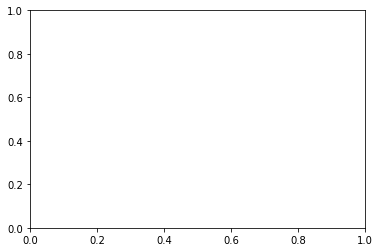

In [6]:
import os
n = {}
for file in path.glob("*.csv"):
    props = properties(file)
    if "," in props["--tree"]:
        continue
    else:
        props["--tree"] = default_properties["--tree"]
        props["--branchlength"] = default_properties["--branchlength"]
    props["--seed"] = default_properties["--seed"]
    if props == default_properties:
        all_data = pandas.read_csv(
            file.open(),
            sep=",",
            na_values=[""],
            comment="#",
            keep_default_na=False,
            encoding='utf-8')

        for language_id, language_data in all_data.groupby("Language_ID"):
            n.setdefault(int(language_id), []).append(vocabulary_size(language_data))
    else:
        print(props, default_properties)

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=[i/2 for i in n.keys()], manage_xticks=False)

plt.plot([1, 2*1048576], [1284, 1284], '0.8', label="Root #Words")

plt.xlabel("time steps $t$")
plt.gca().set_xscale('log')
plt.ylabel("Vocabulary size")
print("Clics: {:0.1f}±{:0.1f}".format(
    numpy.mean(clics_vocabulary), numpy.std(clics_vocabulary)))
stable = numpy.array(sum([n.get(2**i, []) for i in range(23, 27)], []))
print("Simulation: {:0.1f}±{:0.1f}".format(stable.mean(), stable.std()))
plt.gcf().set_size_inches(5,4)
plt.savefig("vocabularysize_timesteps.pdf")


In [ ]:
n[2**22]

In [ ]:
import os
n = {}
c = {}
p = {}
for file in os.listdir(path):
    if condition(file):
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep=",",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        print(file)
        for language_id, language_data in all_data.groupby("Language_ID"):
            n.setdefault(int(language_id), []).append(synonymity(language_data))
            
            sum_width = 0
            m = 0
            accs, widths = [], []
            for form, meanings in language_data.groupby("Cognate_Set"):
                width = meanings["Weight"].sum()**2/(meanings["Weight"]**2).sum()
                accs.append(meanings["Weight"].sum())
                widths.append(width)
                sum_width += width
                m += 1
            c.setdefault(int(language_id), []).append(numpy.corrcoef(accs, widths)[1, 0])
            p.setdefault(int(language_id), []).append(sum_width/m)

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=[i/2 for i in n.keys()], manage_xticks=False)
plt.boxplot(list(p.values()), positions=list(p.keys()), widths=[i/2 for i in p.keys()], manage_xticks=False,
               boxprops=dict(color='blue'), medianprops=dict(color='red'))

plt.plot([1, 2*1048576], [1, 1], '0.8')

plt.plot([0,0],[1,1],c='red',label="Polysemy")
plt.plot([0,0],[1,1],c='orange',label="Synonymity")
plt.xlabel("time steps $t$")
plt.gca().set_xscale('log')
plt.ylabel("Average Polysemy/Synonymity")
plt.legend()
print("Synonymity")
#print("Clics: {:0.1f}±{:0.1f}".format(
#    numpy.mean(clics_synonymity), numpy.std(clics_synonymity)))
stable = numpy.array([n[2**i] for i in range(20, 22)])
# print("Simulation: {:0.1f}±{:0.1f}".format(stable.mean(), stable.std()))
print("Polysemy")
# print("Clics: {:0.1f}±{:0.1f}".format(
#    numpy.mean(clics_semantic_width), numpy.std(clics_semantic_width)))
stable = numpy.array([p[2**i] for i in range(20, 22)])
#print("Simulation: {:0.1f}±{:0.1f}".format(stable.mean(), stable.std()))
plt.gcf().set_size_inches(5,4)
plt.savefig("synonymitypolysemy_timesteps.pdf")


In [ ]:
plt.boxplot(list(c.values()), positions=list(c.keys()), widths=[i/2 for i in c.keys()], manage_xticks=False)

plt.xlabel("time steps $t$")
plt.gca().set_xscale('log')
plt.ylabel("Correlation between semantic width and accessibility")
plt.legend()

plt.gcf().set_size_inches(5,4)
plt.savefig("correlation_timesteps.pdf")
